In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numberOfPoints = 4
phi = np.linspace(0, 2*np.pi,numberOfPoints)
B = np.array([2*np.cos(phi),5*np.sin(phi)])
B

array([[  2.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
          2.00000000e+00],
       [  0.00000000e+00,   4.33012702e+00,  -4.33012702e+00,
         -1.22464680e-15]])

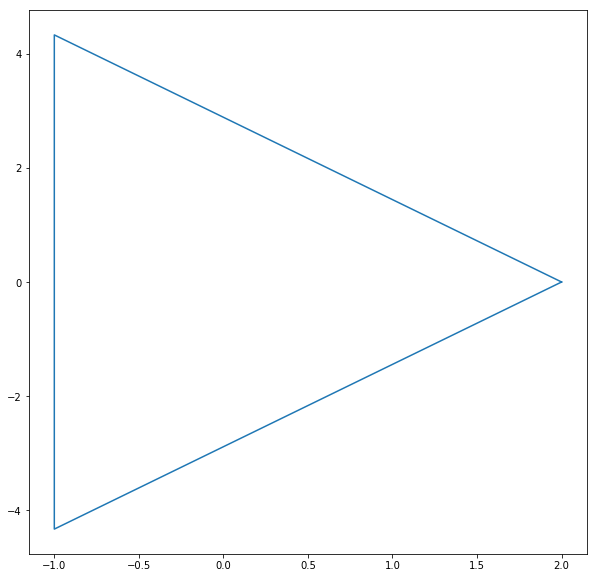

In [3]:
plt.rcParams['figure.figsize'] = 10,10
plt.figure()
plt.plot(B[0,:],B[1,:])
plt.show()

In [4]:
theta = np.pi/2
tr = np.array([[10],[7]])
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
T = np.vstack((np.hstack((R,tr)),np.array([0,0,1])))
T

array([[10],
       [ 7]])

array([[  6.12323400e-17,  -1.00000000e+00,   1.00000000e+01],
       [  1.00000000e+00,   6.12323400e-17,   7.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [6]:
Baum = np.vstack((B,np.ones((1,numberOfPoints))))
Baum

array([[  2.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
          2.00000000e+00],
       [  0.00000000e+00,   4.33012702e+00,  -4.33012702e+00,
         -1.22464680e-15],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

In [7]:
BtrRot = T@Baum
BtrRot

array([[ 10.        ,   5.66987298,  14.33012702,  10.        ],
       [  9.        ,   6.        ,   6.        ,   9.        ],
       [  1.        ,   1.        ,   1.        ,   1.        ]])

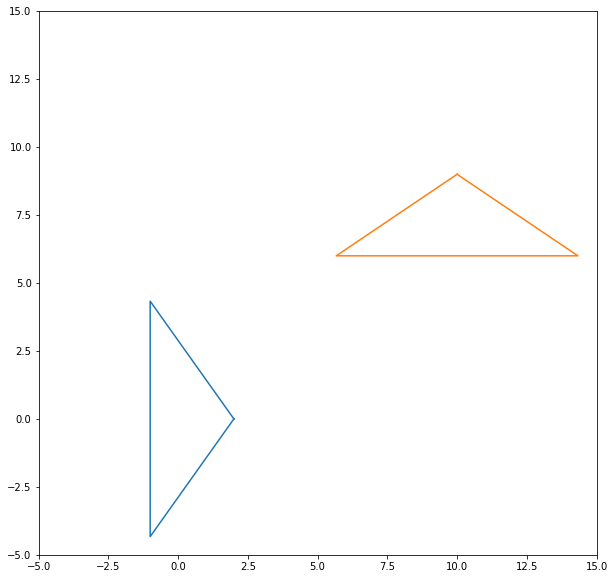

In [8]:
plt.figure()
plt.plot(B[0,:],B[1,:],BtrRot[0,:],BtrRot[1,:])
plt.xlim((-5,15))
plt.ylim((-5,15))
plt.show()

<IPython.core.display.Javascript object>


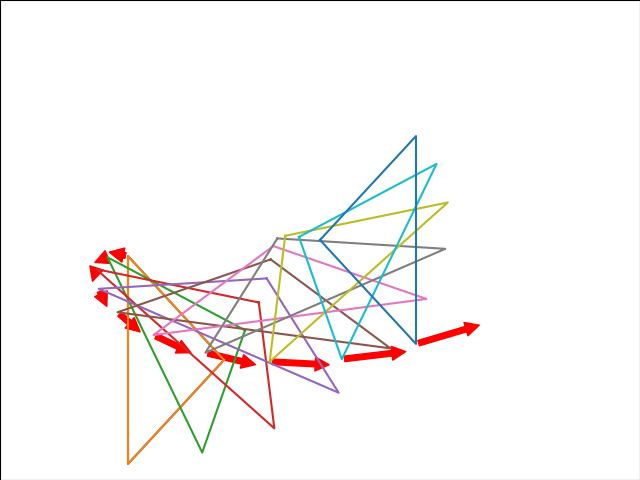

In [24]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrowPatch
t = np.linspace(0,10,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.show()
def run(i):
    theta = np.pi/10*t[i]
    tr = np.array([[0.7],[0.5]])*t[i]
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    T = np.vstack((np.hstack((R,tr)),np.array([0,0,1])))
    Brot = R@B
    BtrRot = T@Baum
    plt.plot(BtrRot[0,:],BtrRot[1,:])
    v = np.array([[0.7],[0.5]]) + np.array([[-np.pi/10*Brot[1,1]],[np.pi/10*Brot[0,1]]])
    vec1 = FancyArrowPatch(np.array([float(BtrRot[0,1]),float(BtrRot[1,1])]),
                           np.array([float(BtrRot[0,1]+v[0]),float(BtrRot[1,1]+v[1])]),mutation_scale=20,color='r')
    ax.add_artist(vec1)
    plt.xlim((-5,15))
    plt.ylim((-5,15))
    
ani = FuncAnimation(fig, run, frames = 10,repeat=False,  interval =500)
plt.show()



<IPython.core.display.Javascript object>


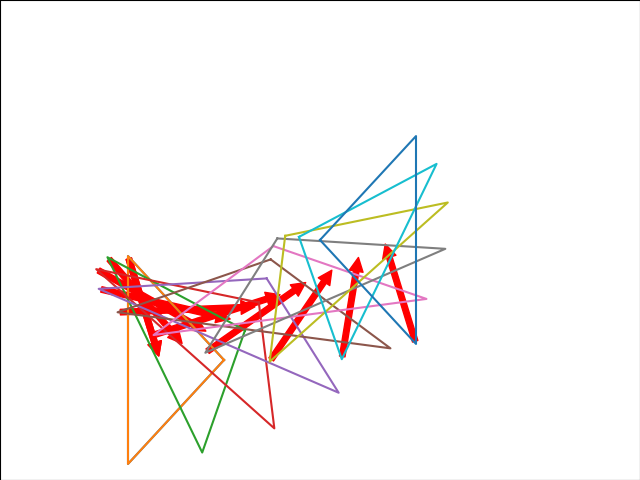

In [27]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrowPatch
t = np.linspace(0,10,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.show()
def run(i):
    aC = np.array([[0],[0]])
    alpha = 0
    theta = np.pi/10*t[i]
    tr = np.array([[0.7],[0.5]])*t[i]
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    T = np.vstack((np.hstack((R,tr)),np.array([0,0,1])))
    Brot = R@B
    BtrRot = T@Baum
    plt.plot(BtrRot[0,:],BtrRot[1,:])
    a = 10*(aC + np.array([[-alpha*Brot[1,1]],[alpha*Brot[0,1]]]) + np.array([[-(np.pi/10)**2*Brot[0,1]],[-(np.pi/10)**2*Brot[1,1]]]))
    vec1 = FancyArrowPatch(np.array([float(BtrRot[0,1]),float(BtrRot[1,1])]),
                           np.array([float(BtrRot[0,1]+a[0]),float(BtrRot[1,1]+a[1])]),mutation_scale=20,color='r')
    ax.add_artist(vec1)
    plt.xlim((-5,15))
    plt.ylim((-5,15))
    
ani = FuncAnimation(fig, run, frames = 10,repeat=False,  interval =500)
plt.show()